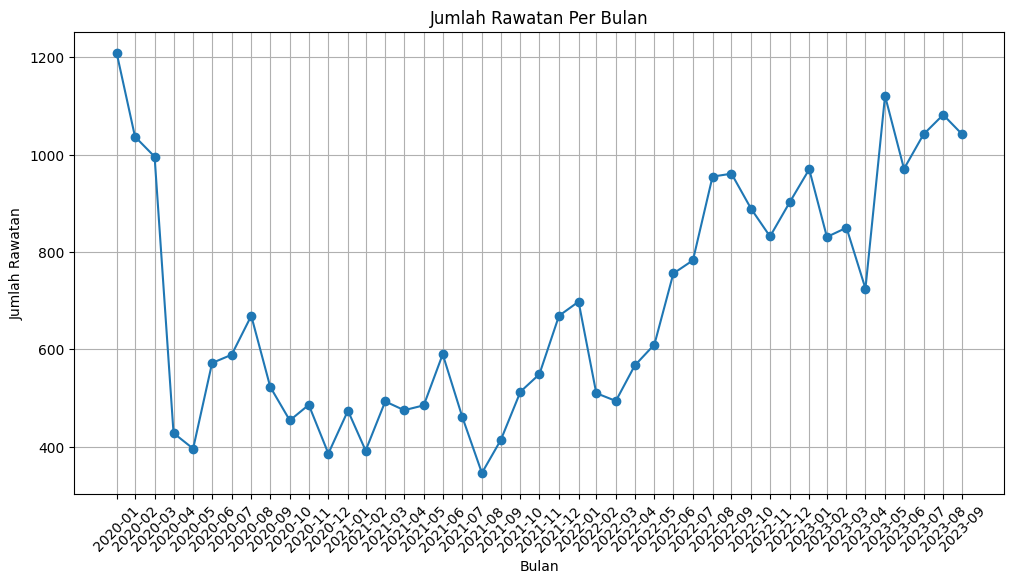

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari file CSV
file_path = 'analytic/fakta_rawatan.csv'  # ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Konversi kolom 'tanggal' ke datetime
data['tanggal'] = pd.to_datetime(data['tanggal'])

# Set kolom 'tanggal' sebagai index
data.set_index('tanggal', inplace=True)

# Kelompokkan data per bulan dan hitung jumlah rawatan
rawatan_per_bulan = data.resample('M').size()

# Buat line chart
plt.figure(figsize=(12, 6))
plt.plot(rawatan_per_bulan.index, rawatan_per_bulan.values, marker='o', linestyle='-')
plt.title('Jumlah Rawatan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.grid(True)

# Format sumbu x agar menunjukkan label bulan yang lebih mudah dibaca
plt.xticks(rawatan_per_bulan.index, rawatan_per_bulan.index.strftime('%Y-%m'), rotation=45)

plt.show()



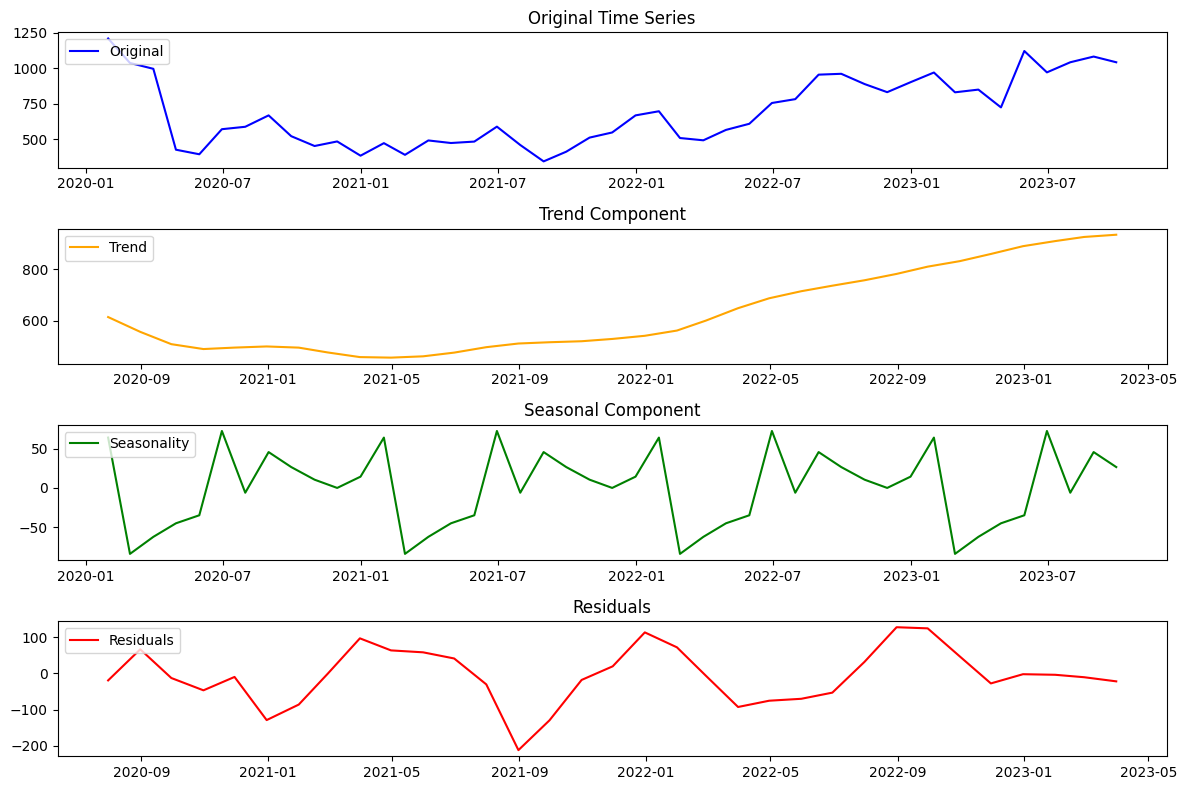

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Baca data dari file CSV
file_path = 'analytic/fakta_rawatan.csv'  # ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Konversi kolom 'tanggal' ke datetime
data['tanggal'] = pd.to_datetime(data['tanggal'])

# Set kolom 'tanggal' sebagai index
data.set_index('tanggal', inplace=True)

# Kelompokkan data per bulan dan hitung jumlah rawatan
rawatan_per_bulan = data.resample('M').size()

# Lakukan dekomposisi menggunakan 'additive' model (atau 'multiplicative' jika data menunjukkan pola eksponensial)
decomposition = seasonal_decompose(rawatan_per_bulan, model='additive')

# Plot hasil dekomposisi
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(rawatan_per_bulan, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
